# Módulo Nº 2 
## Calculo Avanzado-MAT1189-1-2021-1
## Proyecto Abril "optimización"
### Integrantes: Enrique Cayupan, Bryan Silva, Dennis Riffo.




El modelo que elegimos para realizar la optimizacion es el Weibull, que se define mediante la siguiente funcion:

$u(t)=1-e^{-at}$

Posteriormente el resultado de nuestro modelo lo reemplazaremos en la funcion de costo que se define por:

$f(p)=\sum_{i=1}^{n}(y(p;x_i)-\hat{y}_i)^2$

Para graficar nuestro modelo en Python ocupamos los modulos de numpy y matplotlib

In [44]:
import numpy as np
import matplotlib.pyplot as plt

Los modulos que utilizaremos para las representaciones graficas son las siguientes:

In [45]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches

Nuestra variable t estara definida de manera secuencial en el tiempo, el cual partira con el valor  
0.1 hasta 3 con paso 0.1. dando un total de 30 datos los cuales seran evaluados en nuestro modelo Weibull

In [46]:
t = np.linspace(0.1, 3, 30)
a = 2.0
b = 0.5

Definiremos el modelo a modo de funcion con los parametros que necesitaremos para
que esta retorne el resultado de la funcion Weibull.

In [47]:
def Weibull(t,a):
    func = 1-np.exp(-(a*t))
    return func

In [48]:
def Higuchi(t,a,b):
    func2= a*t**(b)
    return func2

Luego para graficar utilizamos plot y en sus parametros llamamos a la funcion del modelo de Weibull que se definio anteriormente.

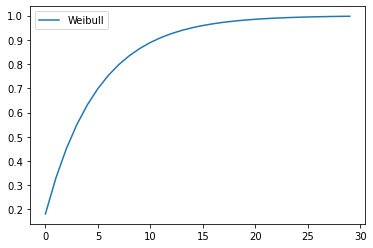

In [49]:
plt.plot(Weibull(t,a),label='Weibull')
plt.legend()
plt.show()

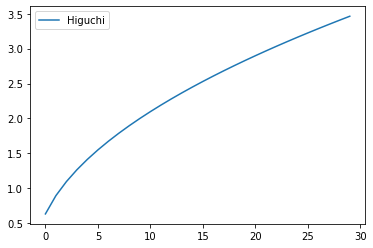

In [50]:
plt.plot(Higuchi(t,a,b),label="Higuchi")
plt.legend()
plt.show()

Como resultado, llamamos nuevamente la funcion, para mostrar los valores que obtendremos y 
utilizaremos en el eje Y de la representacion grafica de nuestro modelo cuadratico

In [51]:
print("Datos Weibull: \n ",Weibull(t,a))
print("Datos Higuchi: \n ",Higuchi(t,a,b))

Datos Weibull: 
  [0.18126925 0.32967995 0.45118836 0.55067104 0.63212056 0.69880579
 0.75340304 0.79810348 0.83470111 0.86466472 0.88919684 0.90928205
 0.92572642 0.93918994 0.95021293 0.9592378  0.96662673 0.97267628
 0.97762923 0.98168436 0.98500442 0.98772266 0.98994816 0.99177025
 0.99326205 0.99448344 0.99548342 0.99630214 0.99697245 0.99752125]
Datos Higuchi: 
  [0.63245553 0.89442719 1.09544512 1.26491106 1.41421356 1.54919334
 1.67332005 1.78885438 1.8973666  2.         2.0976177  2.19089023
 2.28035085 2.36643191 2.44948974 2.52982213 2.60768096 2.68328157
 2.75680975 2.82842712 2.89827535 2.96647939 3.03315018 3.09838668
 3.16227766 3.2249031  3.28633535 3.34664011 3.40587727 3.46410162]


Se define la funcion Rosenbrock para su posterior implementacion con nuestro modelo

In [52]:
f = lambda x,y: (x-1)**2 + 100*(y-x**2)**2;

Para la representación de la función de Rosenbrock como no lineal,  implementamos nuestros datos conseguidos por nuestro modelo Weibull ya que fue el que entrego datos mas optimos en comparacion a la tabla del guion. Por lo tanto, estos iran en  representación de los ejes (X,Y) de la función de Rosenbrock.

In [53]:
# Evaluar la funcion
X = np.arange(-2, 2, 0.15)
Y = np.arange(-1, 3, 0.15)
X, Y = np.meshgrid(X, Y)
Z = f(X,Y)

Las siguientes lineas de codigo es simplemente para para mostrar el plot de nuestra funcion 
y ajustar los ejes de la imagen.

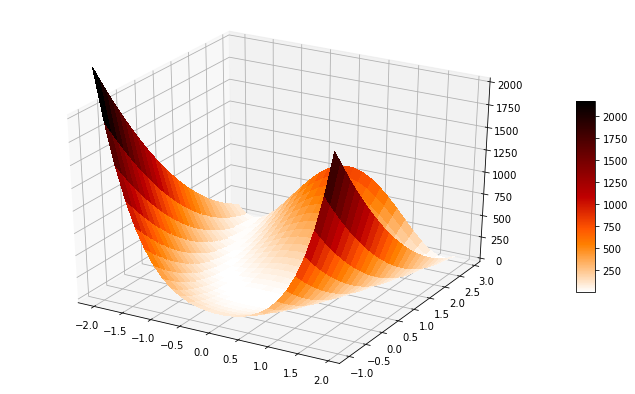

In [54]:
figRos = plt.figure(figsize=(12, 7))
axRos = figRos.gca(projection='3d')
surf = axRos.plot_surface(X, Y, Z, cmap=cm.gist_heat_r,
                       linewidth=0, antialiased=False)
axRos.set_zlim(0, 2000)
figRos.colorbar(surf, shrink=0.5, aspect=10)
plt.show() 

Implementacion de la gradiante de la funcion Rosenbrock, la cual se define de la siguiente forma: $\triangledown f=(\frac{2(x-1)-4b(y-x^{2})x}{2b(y-x^{2})})$

In [55]:
B = 10;
df = lambda x,y: np.array([2*(x-1) - 4*B*(y - x**2)*x, \
                         2*B*(y-x**2)])

Optimizacion: 

In [56]:
F = lambda X: f(X[0],X[1])
dF = lambda X: df(X[0],X[1])

In [57]:
x0 = np.array([-1.4,1.1])
print(F(x0))
print(dF(x0))

79.71999999999994
[-52.96 -17.2 ]


Se definen los parametros de la figura y agregamos los atributos para contornear nuestra gradiante de Rosenbrock.

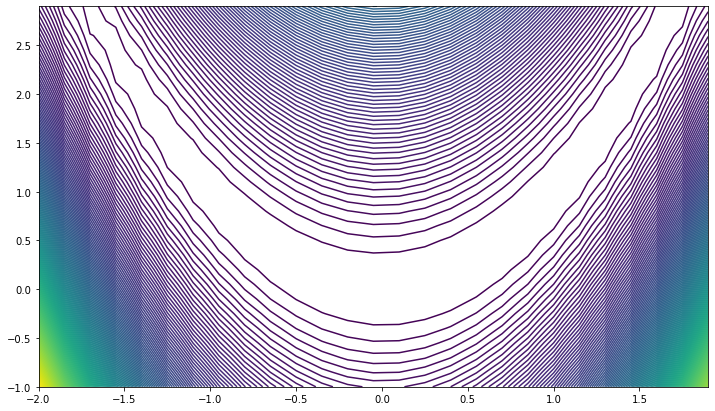

In [58]:
plt.figure(figsize=(12, 7))
plt.contour(X,Y,Z,200)
plt.show()